In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
font = {'family':'IPAexGothic'}
plt.rc('font', **font)
import numpy as np
import sklearn.cluster as skc

とある研修の演習課題で展開されたサンプルコードです。次のコードブロックにおける画像のディレクトリを、お好きなモノに変更してください。

In [2]:
A = plt.imread("./kirby.jpg").astype(np.float32)/255
#intで0から255で表現するのではなく、float64で0から1で表現することで、k平均法フィッティング時の型関係のトラブルを回避。しかしメモリ節約にはならない。

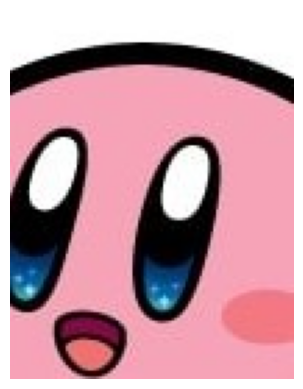

In [3]:
plt.axis("off")
plt.imshow(A)
plt.show()

Aは縦、横、カラー(RGB)の３次元の配列でなっています。

In [4]:
img_size = A.shape
print(img_size)

(133, 102, 3)


この縦、横の部分をフラットにして2次元配列にします。

In [5]:
Aflatten = A.reshape(img_size[0]*img_size[1], 3)

これをk平均法でクラスタリングしましょう。K個のクラスタに分けると、似たような種類は一色にまとめられ、K種類の色だけで画像が表現されるようになります。もともと256×256×256色で各ピクセルが表現されていたわけですから、大幅に容量を減らせることになります。

In [6]:
K = 7
# estimator_pic = skc.KMeans(n_clusters=K, n_jobs=-1) #n_jobs=-1でCPUの全コア利用。デフォルトでは1コア利用。
estimator_pic = skc.KMeans(n_clusters=K) #n_jobs=-1でCPUの全コア利用。デフォルトでは1コア利用。
estimator_pic.fit(Aflatten)
color_idx = estimator_pic.predict(Aflatten)
color_centroids = estimator_pic.cluster_centers_

/home/tomiie/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


`color_centroids`と`color_idx`を用いて元の画像し、その画像を表示します。

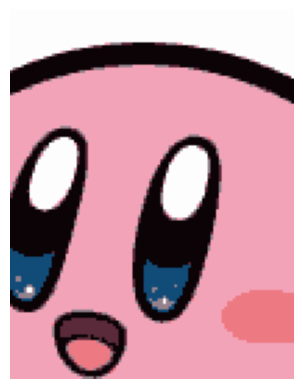

In [7]:
#Coursemale-06 Step7 QuestionNumber7 ddefa99e34fcfb3fcac0f4ce4d145d1d
###############START CODE HERE###############
#適切な 関数・変数・値 などにNoneを書き換えてください。
Aflatten_recovered = np.array([color_centroids[i] for i in color_idx])
A_recovered = Aflatten_recovered.reshape(img_size[0], img_size[1], 3)
plt.axis("off")
plt.imshow(A_recovered)
plt.show()
###############END CODE HERE###############

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


4444444444
4433333444
3322222233
2222222222
2222222222
2442224222
3432244222
3322233222
3322333222
1322213222
3222212255
2266222255
2255222222
1 : 0x114b78
2 : 0xf3a3b7
3 : 0x0b0306
4 : 0xfdfdfd
5 : 0xed7983
6 : 0x5a2a3a
7 : 0x93818b
[4444444444, 4433333444, 3322222233, 2222222222, 2222222222, 2442224222, 3432244222, 3322233222, 3322333222, 1322213222, 3222212255, 2266222255, 2255222222]


findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Font family 'IPAexGothic' not found.
findfont: Fon

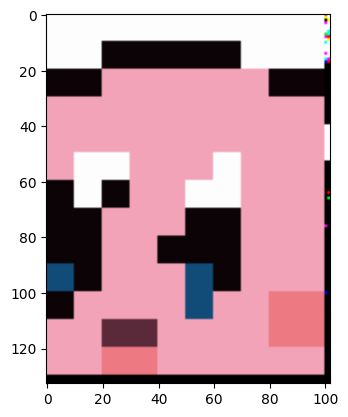

In [8]:
from scipy import stats

color_idx_reshaped = color_idx.reshape(img_size[0], img_size[1])
mosaic_color_idx = np.empty((img_size[0], img_size[1]))
mosaic_img = np.empty((img_size[0], img_size[1], img_size[2]))
tetris_color_index = []
w,h,c = A_recovered.shape

# 中心画素から両端画素までの長さ
k = 10
size = k // 2

# プーリング処理
for i, x in enumerate(range(size, w, k)):
    tetris_color_index_row = 0
    for j, y in enumerate(range(size, h, k)):
        mode_idx = stats.mode(color_idx_reshaped[x-size:x+size,y-size:y+size], axis=None, keepdims=False).mode
        mosaic_color_idx[x-size:x+size,y-size:y+size] = mode_idx
        mosaic_img[x-size:x+size,y-size:y+size] = color_centroids[mode_idx]
        tetris_color_index_row = tetris_color_index_row*10 + (mode_idx + 1)
    print(tetris_color_index_row)
    tetris_color_index.append(tetris_color_index_row)

colors = color_centroids*255
for i, color in enumerate(colors):
    color_code = str(format(int(color[0]), '02x')) + str(format(int(color[1]), '02x')) + str(format(int(color[2]), '02x'))
    # color_code = color_code.replace('0x', '')
    print (str(i+1) + ' : 0x' + color_code)

plt.imshow(mosaic_img)
print(tetris_color_index)
